In [1]:
"""
conda install pandas numpy seaborn folium basemap
pip install ckanapi cufflinks
"""
%matplotlib nbagg
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import matplotlib.ticker as tick
from mpl_toolkits.basemap import Basemap
import folium

import pandas as pd

from ckanapi import RemoteCKAN

import cufflinks
import seaborn


graph_figsize = (10,6)

# Data Science with Python

## AKA How am I expected to follow that?

Dr. Andrew Bolster 
* [bolster.online](https://bolster.online)
* Tweets [@bolster](https://twitter.bolster.online)
* GitHubs at [andrewbolster](https://github.com/andrewbolster)
* Works at [Sensum Co](https://sensum.co) **We're hiring DS/DevOps**
* Plays at [Farset Labs](https://www.farsetlabs.org.uk)


# Zee Plan
* (Honorary Mention) [CKANApi](https://github.com/ckan/ckanapi)
* Pandas
* Seaborn
* ~~Patsy *(If I don't run massively over time)*~~ I ran massively over time and got distracted by
* Cufflinks
* Basemap

## Pandas
* Data Import / Export (Not really shown but ask me about it)
* *Actually Decent* Datetime operation
* Boiled in Stats and Grouping

## Seaborn
* Pretty Pretty Graphs
* Fantastic "I have no idea what I'm looking at" explorations

~~## Patsy
* R-like statistical modelling building on `statsmodels` and `pandas`
* *IANASIJP1OTV* - I Am Not A Statisician I Just Play 1 On TV~~

## Cufflinks
* "Prettier, Interactive, Seaborn" - Me 2016

## Basemap
* Everything looks better on a map

## Folium
* Everything looks better on prettier maps **May Break Everything**
* Oh dear god this notebook is getting huge...

# Zee Data
## DF - [Contracts Awarded by Central Procurement Directorate](https://www.opendatani.gov.uk/dataset/contracts-awarded-by-central-procurement-directorate-in-the-2016-2017-year)

From [OpenDataNI](https://www.opendatani.gov.uk), released under the [UK OGL v3](http://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/)


## Introducting Python `ckanapi`
* Wrapper to talk to CKAN datasets 'easily'
* I discovered this 3 days ago so have only scratched the surface...

## Getting a list of dataset groups

In [2]:
ua = 'ItsBolster/29.5 (+http://farsetlab.org.uk/)'
demo = RemoteCKAN('https://www.opendatani.gov.uk/', user_agent=ua)
groups = demo.action.group_list(id='data-explorer')
print(groups)

['economy', 'education', 'environment', 'finance', 'health', 'population', 'property', 'tourism', 'transport']


## Getting stats on Datasets per group
Also hinting at `pandas` Dataframes

In [3]:
pd.DataFrame(demo.action.group_list(id='data-explorer', all_fields=True)).keys()

Index(['approval_status', 'created', 'description', 'display_name', 'id',
       'image_display_url', 'image_url', 'is_organization', 'name',
       'num_followers', 'package_count', 'revision_id', 'state', 'title',
       'type'],
      dtype='object')

In [4]:
pd.DataFrame(demo.action.group_list(id='data-explorer', all_fields=True)).head()

,approval_status,created,description,display_name,id,image_display_url,image_url,is_organization,name,num_followers,package_count,revision_id,state,title,type
0,approved,2015-07-28T16:24:55.207729,,"Economy, industry & employment",39dae6c3-e452-4eed-bee9-4dd056d6a8de,https://www.opendatani.gov.uk/uploads/group/20...,2015-11-20-160744.768275economy.png,False,economy,0,35,bfc12df7-e28e-4be5-8879-ad2d9cd459a7,active,"Economy, industry & employment",group
1,approved,2015-07-28T16:24:53.911198,,Education,040dacc9-7871-433e-ada9-646f086832cf,https://www.opendatani.gov.uk/uploads/group/20...,2015-11-20-162541.954816education.png,False,education,0,23,e747dc9a-3ee8-4ee5-adfc-dbe8740fd0ed,active,Education,group
2,approved,2015-07-28T16:24:54.727141,,Environment & agriculture,53255e5c-2c7e-4792-a0f6-d4ede189a614,https://www.opendatani.gov.uk/uploads/group/20...,2015-11-20-162610.730369environment.png,False,environment,0,62,fff7a193-d2ab-4cf6-96d9-2d8e23b5c169,active,Environment & agriculture,group
3,approved,2015-07-28T16:24:54.188726,,Finance,2940449f-07d9-4c02-9a49-d45982b97155,https://www.opendatani.gov.uk/uploads/group/20...,2015-11-20-162631.313020finance.png,False,finance,0,34,bae4b69a-3aa3-439e-a860-92d72e07be2b,active,Finance,group
4,approved,2015-07-28T16:24:53.601881,,Health,ec045f21-9af2-4bc0-aa04-e6e3df296590,https://www.opendatani.gov.uk/uploads/group/20...,2015-11-20-162619.537575health.png,False,health,0,37,b5f6e4df-ab0b-4ce1-82f3-4b0215df0557,active,Health,group


## Basic Graphing with `matplotlib` and `pandas`

<IPython.core.display.Javascript object>


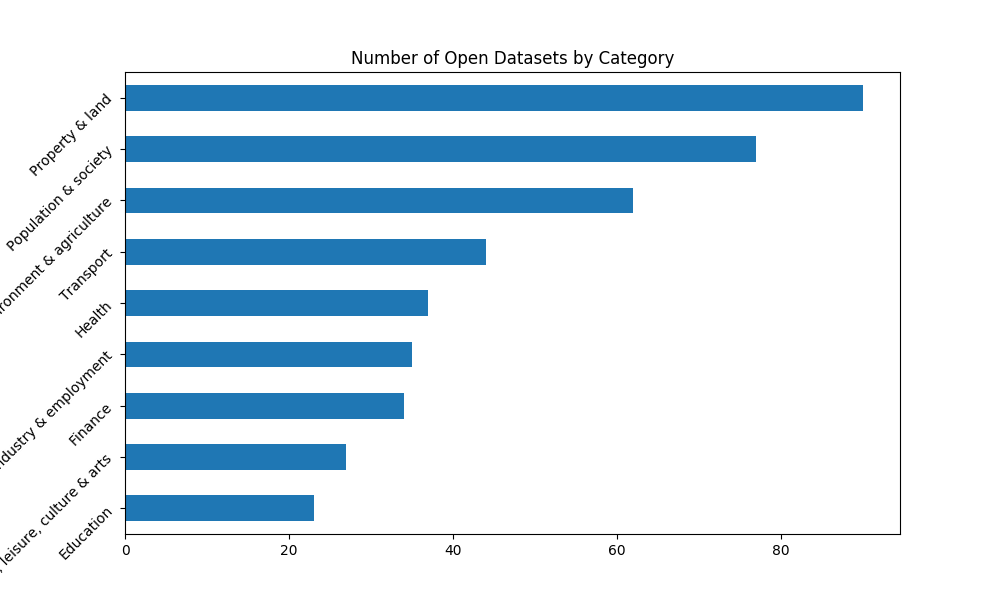

In [5]:
f,ax = plt.subplots(figsize=graph_figsize)
pd.DataFrame(
    demo.action.group_list(id='data-explorer', all_fields=True)
).set_index('title')['package_count'].sort_values().plot.barh(ax=ax,rot=45, title='Number of Open Datasets by Category')

## Acquiring Datastores from OpenDataNI directly
I've not explored the datastore query language in `ckanapi` so these are magic numbers taken from the OpenDataNI Website

In [6]:
# Contracts awarded by CPD Construction Division - 
construction_resource_id = '6cc96ec3-9ec5-426d-9e5d-f67a9423d0ab'
# Contracts awarded by CPD Supplies and Services 
supplies_resource_id = 'd5b993f2-4f6f-4e94-9f45-c77b98201438'

Lets start with the Construction Division
(Smaller dataset (71))

In [7]:
def dataset_generator(resource_id): 
    """A Generator that yields records from a given dataset resource id"""
    offset=0
    while True:
        datastore_page = demo.action.datastore_search(resource_id=resource_id, offset=offset)
        if not datastore_page['records']:
            raise StopIteration
        for record in datastore_page['records']:
            yield record
            offset+=1

df = pd.DataFrame.from_records(dataset_generator(construction_resource_id))
df.head()

,Awarded value,Basis for DAC Award,City,Company name,Contract Number,Contract awarded by,Date of Award,Latitude,Longitude,Postal code,Street,Title,_id
0,40976,N/A,Belfast,Atkins Ltd,CPDC-100,Department of Agriculture Environment and Rura...,2016-04-26T00:00:00,54.6050193,-5.9093978,BT3 9DE,71 Old Channel Road,DARD - Flood Risk Management Investment Strategy,1
1,529740,N/A,Belfast,McAdam Design Ltd,CPDC-28,Department of Education NI,2016-04-27T00:00:00,54.5795073,-5.8760029,BT5 6BQ,1C Montgomery House 478 Castlereagh Road,DENI - Appointment of Integrated Design Team f...,2
2,43914.7,N/A,Belfast,Atkins Ltd,CPDC-68,Department of Agriculture Environment and Rura...,2016-12-05T00:00:00,54.6050193,-5.9093978,BT3 9DE,71 Old Channel Road,DAERA - Killynure Armco Culvert Feasibility Study,3
3,17275,N/A,Belfast,AECOM Infrastructure & Environment UK Ltd,CPDC-109,Department of Agriculture Environment and Rura...,2016-05-25T00:00:00,54.5479762,-5.9111546,BT8 7RP,Beechill House 40 Beechill Road,DAERA - Linen Green Moygashel Feasibility Study,4
4,110000,N/A,Belfast,Ove Arup & Partners International Ltd,CPDC-45,Department of Agriculture Environment and Rura...,2016-05-25T00:00:00,54.5943264,-5.930001,BT2 8BG,The Linenhall 32-38 Linenhall Street,NI Fisheries and Harbour Authority - Framework...,5


## How much?
`ckanapi` doesn't appear to do any data introspection so everything appears as strings initially

Easily fixed with `pandas`

In [8]:
# Floatify monies
df['Awarded value']=df['Awarded value'].astype(float)
df['Awarded value'].mean()

643731.4957142854

Pandas has built in stats capability to easily describe columns

In [9]:
(df['Awarded value']/1000).describe() # NOTE in £k

count       70.000000
mean       643.731496
std       1813.213222
min          1.896380
25%         29.296310
50%        177.180895
75%        397.129900
max      12642.728600
Name: Awarded value, dtype: float64

<IPython.core.display.Javascript object>


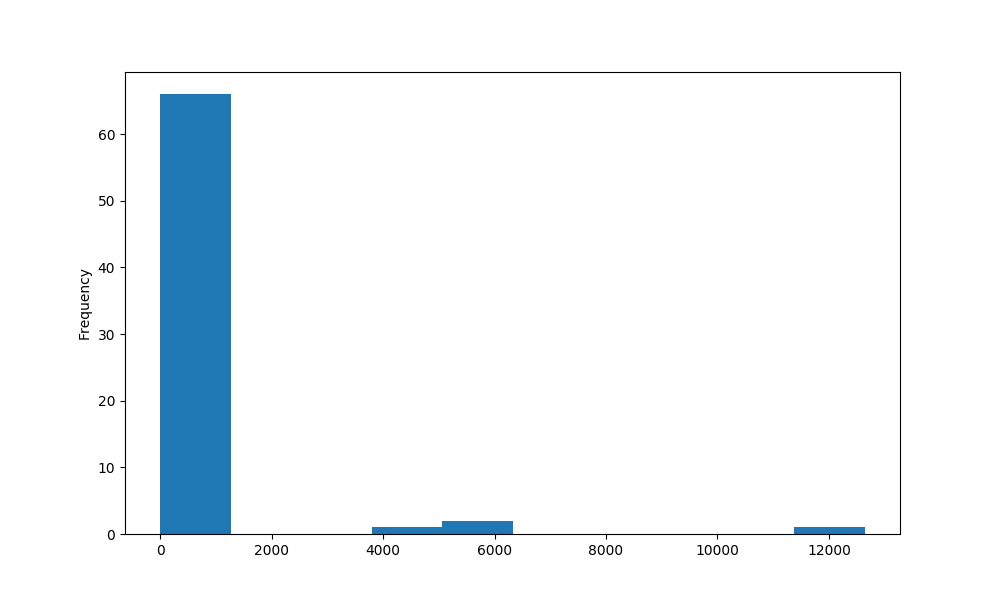

In [10]:
f,ax = plt.subplots(figsize=graph_figsize)
(df['Awarded value']/1000).plot.hist(ax=ax)

<IPython.core.display.Javascript object>


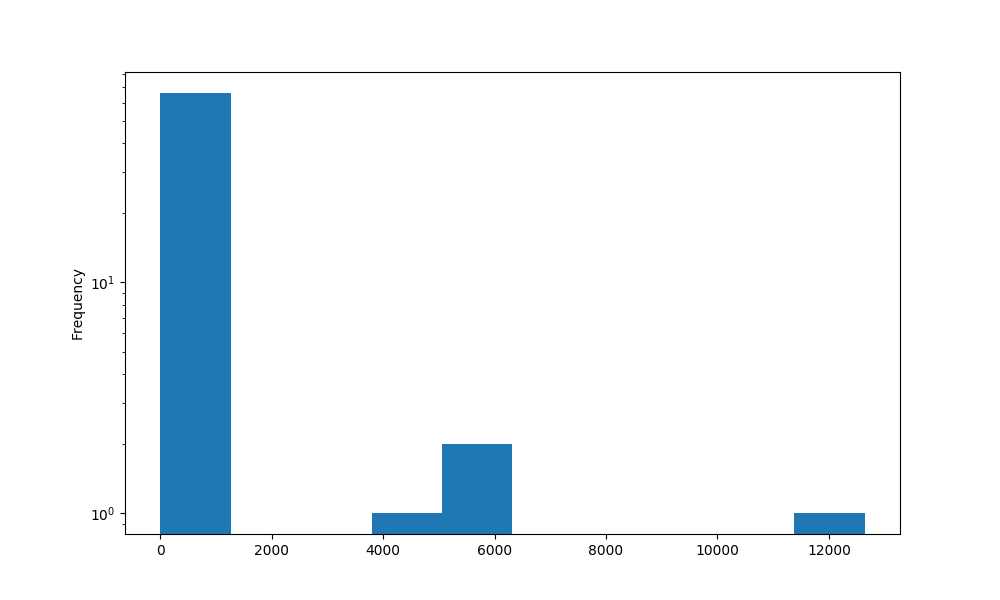

In [11]:
f,ax = plt.subplots(figsize=graph_figsize)
(df['Awarded value']/1000).plot.hist(ax=ax, logy=True)

<IPython.core.display.Javascript object>


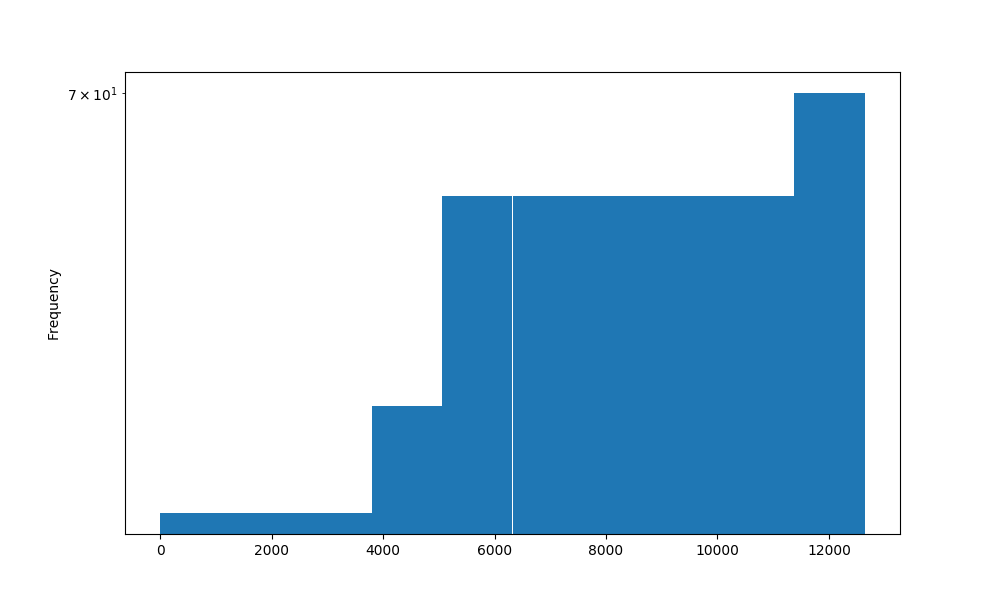

In [12]:
f,ax = plt.subplots(figsize=graph_figsize)
(df['Awarded value']/1000).plot.hist(ax=ax, logy=True, cumulative=True)

Open Datasets (esp. Gov) notoriously bad at "Coding" entries, so end up with variations in:
* Case (NI vs ni, Ltd vs LTD, WITHHELD vs Withheld)
* Abbreviations (NI vs Northern Ireland)

In [13]:
# Note withheld, RPS Ireland, WYG
company_list = df['Company name'].unique()
print("There are {} unique company names".format(len(company_list)), sorted(company_list))

There are 27 unique company names ['AECOM Infrastructure & Environment', 'AECOM Infrastructure & Environment UK Ltd', 'AG Wilson Ltd', 'Active Maintenance Solutions Ltd', 'Atkins Ltd', 'Cleary Contracting Ltd', 'Doran Consulting Ltd', 'Doran HMK', 'Doran HMK JV', 'Fox Building & Engineering Ltd', 'Hamilton Architects', 'John McQuillan (Contracts) Ltd', 'Lowry Construction Ltd', 'McAdam Design', 'McAdam Design Ltd', 'McMackin Contracts Ltd', 'Ove Arup & Partners International Ltd', 'Quinn Automatic Ltd', 'RPS Ireland Ltd (t/a RPS Consulting Engineers)', 'RPS Ireland Ltd (t/a RPS Consulting engineers)', 'Sirius Geotechnical & Environmental Ltd', 'WITHHELD', 'WYG Management Services', 'WYG Management Services (NI) Ltd', 'WYG Management Services Ltd', 'Withheld', 'Woodvale Construction Company']


So we perform some (greedy, niave, probably broken) input cleaning

In [14]:
text_fields = ['City','Basis for DAC Award','Company name','Contract awarded by','Title','Street']
interesting_fields = None
for text_field in text_fields:
    df[text_field]=df[text_field].str.lower().str.strip() 
    df[text_field]=df[text_field].str.replace(' ltd','')
    df[text_field]=df[text_field].str.replace(' uk','')
    df[text_field]=df[text_field].str.replace(' \(ni\)','')
    
company_list = df['Company name'].unique()
print("There are now {} unique company names".format(len(company_list)), sorted(company_list))

There are now 21 unique company names ['active maintenance solutions', 'aecom infrastructure & environment', 'ag wilson', 'atkins', 'cleary contracting', 'doran consulting', 'doran hmk', 'doran hmk jv', 'fox building & engineering', 'hamilton architects', 'john mcquillan (contracts)', 'lowry construction', 'mcadam design', 'mcmackin contracts', 'ove arup & partners international', 'quinn automatic', 'rps ireland (t/a rps consulting engineers)', 'sirius geotechnical & environmental', 'withheld', 'woodvale construction company', 'wyg management services']


In some cases, there are columns you either don't care about or doesn't contain any meaningful data for analysis; so drop it

In [15]:
df['Basis for DAC Award'].describe()

count      71
unique      1
top       n/a
freq       71
Name: Basis for DAC Award, dtype: object

In [16]:
df.drop('Basis for DAC Award', axis=1, inplace=True)

## Who gave out what?
As well as buggering the coding for `Company name`, department names are also buggered with abbrevs. and inconsistencies

In [17]:
dept_list = df['Contract awarded by'].unique()
print("There are {} unique dept. names".format(len(dept_list)), sorted(dept_list))

There are 26 unique dept. names ['', 'daera', 'dard', 'de', 'deni', 'department for communities', 'department for infrastructure', 'department for infrastructure ni', 'department for the economy ni', 'department of agriculture environment and rural affairs ni', 'department of education', 'department of education ni', 'department of finance', 'department of health ni', 'department of justice ni courts & tribunals service', 'dfc', 'dfi', 'dof properties division', 'lisburn & castlereagh city council', 'ni policing board', 'nips', 'northern ireland office', 'northern ireland prison service', 'psni', 'teo', 'the executive office ni']


In [18]:
df['Contract awarded by'].str.endswith(' ni').mean()

0.25352112676056338

## How do you solve a problem like gov. depts.
* Department names are long, ugly and inconsistent 
* Department abbreviations are gobbledegook and inconsistent too (DARD/DAERA)
* Set "Optimistic" conversions between abbrevs. and depts.

In [19]:
df['Contract awarded by']=df['Contract awarded by'].str.replace(' ni','')
# Edge case for misues of DE/DENI
df.replace(to_replace={'Contract awarded by': {'deni':'de'}}, inplace=True)

department_replacements = {
    'department for communities': 'dfc',
    'department for infrastructure': 'dfi',
    'department for infrastructure transport': 'dfi',
    'department for employment and learning': 'dfe/dfc',
    'department for the economy': 'dfe',
    'department of agriculture environment and rural affairs': 'daera',
    'department of education': 'de',
    'department of finance': 'df',
    'department of health': 'dh',
    'department of justice': 'doj',
    'department of justice courts & tribunals service': 'doj',
    'intertrade ireland': 'iti',
    'invest northern ireland': 'ini',
    'northern ireland office': 'nio',
    'northern ireland prison service': 'nips',
    'ni public health agency': 'pha',
    'police service of northern ireland': 'psni',
    'the executive office': 'teo'
}
df.replace(to_replace={'Contract awarded by':department_replacements})['Contract awarded by'].unique()

array(['daera', 'de', 'ni policing board', 'df', 'dfc', 'dfi', 'dh', 'nio',
       'dfe', 'teo', 'dof properties division', 'doj', '',
       'lisburn & castlereagh city council', 'nips', 'dard', 'psni'], dtype=object)

In [20]:
df.replace(to_replace={'Contract awarded by':department_replacements}, inplace=True)
df.head()

,Awarded value,City,Company name,Contract Number,Contract awarded by,Date of Award,Latitude,Longitude,Postal code,Street,Title,_id
0,40976.0,belfast,atkins,CPDC-100,daera,2016-04-26T00:00:00,54.6050193,-5.9093978,BT3 9DE,71 old channel road,dard - flood risk management investment strategy,1
1,529740.0,belfast,mcadam design,CPDC-28,de,2016-04-27T00:00:00,54.5795073,-5.8760029,BT5 6BQ,1c montgomery house 478 castlereagh road,deni - appointment of integrated design team f...,2
2,43914.7,belfast,atkins,CPDC-68,daera,2016-12-05T00:00:00,54.6050193,-5.9093978,BT3 9DE,71 old channel road,daera - killynure armco culvert feasibility study,3
3,17275.0,belfast,aecom infrastructure & environment,CPDC-109,daera,2016-05-25T00:00:00,54.5479762,-5.9111546,BT8 7RP,beechill house 40 beechill road,daera - linen green moygashel feasibility study,4
4,110000.0,belfast,ove arup & partners international,CPDC-45,daera,2016-05-25T00:00:00,54.5943264,-5.930001,BT2 8BG,the linenhall 32-38 linenhall street,ni fisheries and harbour authority - framework...,5


In [21]:
construction_df = df.copy()
construction_df['Division'] = 'construction'

In [22]:
construction_df.head()

,Awarded value,City,Company name,Contract Number,Contract awarded by,Date of Award,Latitude,Longitude,Postal code,Street,Title,_id,Division
0,40976.0,belfast,atkins,CPDC-100,daera,2016-04-26T00:00:00,54.6050193,-5.9093978,BT3 9DE,71 old channel road,dard - flood risk management investment strategy,1,construction
1,529740.0,belfast,mcadam design,CPDC-28,de,2016-04-27T00:00:00,54.5795073,-5.8760029,BT5 6BQ,1c montgomery house 478 castlereagh road,deni - appointment of integrated design team f...,2,construction
2,43914.7,belfast,atkins,CPDC-68,daera,2016-12-05T00:00:00,54.6050193,-5.9093978,BT3 9DE,71 old channel road,daera - killynure armco culvert feasibility study,3,construction
3,17275.0,belfast,aecom infrastructure & environment,CPDC-109,daera,2016-05-25T00:00:00,54.5479762,-5.9111546,BT8 7RP,beechill house 40 beechill road,daera - linen green moygashel feasibility study,4,construction
4,110000.0,belfast,ove arup & partners international,CPDC-45,daera,2016-05-25T00:00:00,54.5943264,-5.930001,BT2 8BG,the linenhall 32-38 linenhall street,ni fisheries and harbour authority - framework...,5,construction


# And what about services?

In [23]:
df = pd.DataFrame.from_records(dataset_generator(supplies_resource_id))
df.head() # Helpful renaming of the "Basis for DAC Award Column", well done DF...

,Awarded value,Basis of Award,City,Company name,Contract awarded by,Contract end date,Date of Award,Latitude,Longitude,Postal code,Street,Title,_id
0,"£77,000.00",,LONDON,WILMINGTON PUBLISHING &amp; INFORMATION LTD,Department of Agriculture Environment and Rura...,2021-03-04T00:00:00,2016-04-04T00:00:00,51.5299906,-0.0911146,N1 7JQ,6-14 UNDERWOOD STREET,CFT223170 - DOE –...,1
1,"£35,400.00",,BELFAST,PERCEPTIVE INSIGHT MARKET RESEARCH LTD,Department for Communities NI,2016-04-08T00:00:00,2016-04-04T00:00:00,54.5942121,-5.8886505,BT5 5AB,109 Bloomfield Avenue,[275750- SC1] - DSD – Consultancy to Carry Out...,2
2,"£430,700.00",,"Ballyvourney Industrial Estate, Co. Cork",DGP INTELSIUS LTD,Department of Agriculture Environment and Rura...,2020-04-04T00:00:00,2016-05-04T00:00:00,51.944811,-9.161592,P12 A527,Unit 8,[123894- SC1] - DARD - Supply and Delivery of ...,3
3,"£430,700.00",,BELFAST,PREMIER SCIENTIFIC LTD,Department of Agriculture Environment and Rura...,2020-04-04T00:00:00,2016-05-04T00:00:00,54.6392358,-5.9014562,BT3 9LA,Unit 3 Scientific Ltd,[123894- SC2] - DARD - Supply and Delivery of ...,4
4,1*,,COALVILLE,ANTALIS LTD,Department of Finance,2016-12-31T00:00:00,2016-06-04T00:00:00,52.6972651,-1.3422078,LE67 1LE,Gateway House,[272312- SC1] - Pan Goverment Collaborative Ar...,5


## Everything old is new again
Do it all over again, and fix column naming inconsistency

In [24]:
df.rename(columns={'Basis of Award':'Basis for DAC Award'}, inplace=True)
text_fields = ['City','Basis for DAC Award','Company name','Contract awarded by','Title','Street']
interesting_fields = None
for text_field in text_fields:
    df[text_field]=df[text_field].str.lower().str.strip()
    df[text_field]=df[text_field].str.replace(' ltd','')
    df[text_field]=df[text_field].str.replace(' uk','')
    df[text_field]=df[text_field].str.replace(' \(ni\)','')

df['Contract awarded by']=df['Contract awarded by'].str.replace(' ni','') # Drop ni
df.replace(to_replace={'Contract awarded by': {'deni':'de'}}, inplace=True) # Edge case for misues of DE/DENI
df.replace(to_replace={'Contract awarded by':department_replacements}, inplace=True) # Depts > Abbrevs

In [25]:
df.head() # WTF is 1*?

,Awarded value,Basis for DAC Award,City,Company name,Contract awarded by,Contract end date,Date of Award,Latitude,Longitude,Postal code,Street,Title,_id
0,"£77,000.00",,london,wilmington publishing &amp; information,daera,2021-03-04T00:00:00,2016-04-04T00:00:00,51.5299906,-0.0911146,N1 7JQ,6-14 underwood street,cft223170 - doe – access to pension scheme leg...,1
1,"£35,400.00",,belfast,perceptive insight market research,dfc,2016-04-08T00:00:00,2016-04-04T00:00:00,54.5942121,-5.8886505,BT5 5AB,109 bloomfield avenue,[275750- sc1] - dsd – consultancy to carry out...,2
2,"£430,700.00",,"ballyvourney industrial estate, co. cork",dgp intelsius,daera,2020-04-04T00:00:00,2016-05-04T00:00:00,51.944811,-9.161592,P12 A527,unit 8,[123894- sc1] - dard - supply and delivery of ...,3
3,"£430,700.00",,belfast,premier scientific,daera,2020-04-04T00:00:00,2016-05-04T00:00:00,54.6392358,-5.9014562,BT3 9LA,unit 3 scientific,[123894- sc2] - dard - supply and delivery of ...,4
4,1*,,coalville,antalis,df,2016-12-31T00:00:00,2016-06-04T00:00:00,52.6972651,-1.3422078,LE67 1LE,gateway house,[272312- sc1] - pan goverment collaborative ar...,5


## WTF is 1*?

In [26]:
# Boolean operators yield Series objects!
(df['Awarded value']=='1*').mean()

0.11654135338345864

11.7% of Service contracts are 'withheld' as per the guidance on the ODNI page:

> For certain types of contract it is difficult to predict the estimated contract value, so this has been recorded as 1*.

Yey for commuinicating the meaning, boo for hiding and hand flapping.

_Plan: Replace 1* with `None` and hope pandas can cope (it can)_

_Cynical Hypothesis: 1*'s are more likely to be direct (unadvertised) awards_

## WTF is DAC
[Direct Award Contract](https://www.finance-ni.gov.uk/publications/cpd-direct-award-contract-form-dac), or "We asked for these guys and noone else"

In [27]:
df['Basis for DAC Award'].describe()
# Lets keep those, but what do they look like?

count     532
unique     15
top          
freq      456
Name: Basis for DAC Award, dtype: object

In [28]:
df[df['Basis for DAC Award'].str.len()>0]['Basis for DAC Award'].unique()
# regulation32 basically means "it was a direct tender". Interesting but not relevant

array(['basis of award: regulation 32',
       'basis of award: in the public interest',
       'basis of award regulation 32',
       'this procurement is for the collection of eu referendum poll cards and delivery to the electorate of northern ireland. [framework value £319714]',
       'travel management services [framework value £60000000]',
       'basis of award:in compliance with regulation 32 of the public contracts regulations 2015',
       'basis of award: in compliance with regulation 32 of the public contracts regulations 2015',
       'framework for disposal services for it equipment, electronic and electrical equipment [framework value £1,000,000]',
       'basis of award public contracts regulations 2015, “as for reasons of extreme urgency brought about by events unforeseeable by the department.',
       'basis of award: in compliance with regulation 32 of the public contracts regulations 2015 regulation 32',
       'the framework agreement (fa) will be used to provide a

### Sidebar: WTF was **extreme urgency**?

In [29]:
urgency = df[df['Basis for DAC Award'].str.contains('extreme').fillna(False)][['Awarded value','Company name','Title','Contract awarded by','Date of Award']]
urgency.iloc[0],urgency.iloc[0]['Title']

(Awarded value                                              £2,500,000.00
 Company name                        microsoft ireland operations limited
 Title                  [667055- sc1] - dac 206/16-dfc-welfare reform ...
 Contract awarded by                                                  dfc
 Date of Award                                        2016-06-12T00:00:00
 Name: 285, dtype: object,
 '[667055- sc1] - dac 206/16-dfc-welfare reform mitigation measures')

So M$FT got £2.5m to fix welfare reform 
> “as for reasons of extreme urgency brought about by events unforeseeable by the department.'

## Question: How many 1*'s were Direct Tenders and is this different from the overall ratio

In [30]:
direct_awards_df = df[df['Basis for DAC Award'].str.len()>0]
direct_awards_df.shape[0], (direct_awards_df['Awarded value']=='1*').mean()

(76, 0.092105263157894732)

_Cynical Hypothesis_ was *wrong*; if anything DAC tenders are _slightly less_ likely to be withheld

Nothing to be gained by keeping the 1* value so we replace it with `None`

In [31]:
df.replace(to_replace={'Awarded value':{'1*':None}}, inplace=True)
df.head()
# Now we can follow the money

,Awarded value,Basis for DAC Award,City,Company name,Contract awarded by,Contract end date,Date of Award,Latitude,Longitude,Postal code,Street,Title,_id
0,"£77,000.00",,london,wilmington publishing &amp; information,daera,2021-03-04T00:00:00,2016-04-04T00:00:00,51.5299906,-0.0911146,N1 7JQ,6-14 underwood street,cft223170 - doe – access to pension scheme leg...,1
1,"£35,400.00",,belfast,perceptive insight market research,dfc,2016-04-08T00:00:00,2016-04-04T00:00:00,54.5942121,-5.8886505,BT5 5AB,109 bloomfield avenue,[275750- sc1] - dsd – consultancy to carry out...,2
2,"£430,700.00",,"ballyvourney industrial estate, co. cork",dgp intelsius,daera,2020-04-04T00:00:00,2016-05-04T00:00:00,51.944811,-9.161592,P12 A527,unit 8,[123894- sc1] - dard - supply and delivery of ...,3
3,"£430,700.00",,belfast,premier scientific,daera,2020-04-04T00:00:00,2016-05-04T00:00:00,54.6392358,-5.9014562,BT3 9LA,unit 3 scientific,[123894- sc2] - dard - supply and delivery of ...,4
4,None,,coalville,antalis,df,2016-12-31T00:00:00,2016-06-04T00:00:00,52.6972651,-1.3422078,LE67 1LE,gateway house,[272312- sc1] - pan goverment collaborative ar...,5


## Following the Money
Need to get rid of £ and , so we can safely convert the string to a float

In [32]:
df['Awarded value']=df['Awarded value'].replace('[£,]','', regex=True).astype(float)
df.head()

,Awarded value,Basis for DAC Award,City,Company name,Contract awarded by,Contract end date,Date of Award,Latitude,Longitude,Postal code,Street,Title,_id
0,77000.0,,london,wilmington publishing &amp; information,daera,2021-03-04T00:00:00,2016-04-04T00:00:00,51.5299906,-0.0911146,N1 7JQ,6-14 underwood street,cft223170 - doe – access to pension scheme leg...,1
1,35400.0,,belfast,perceptive insight market research,dfc,2016-04-08T00:00:00,2016-04-04T00:00:00,54.5942121,-5.8886505,BT5 5AB,109 bloomfield avenue,[275750- sc1] - dsd – consultancy to carry out...,2
2,430700.0,,"ballyvourney industrial estate, co. cork",dgp intelsius,daera,2020-04-04T00:00:00,2016-05-04T00:00:00,51.944811,-9.161592,P12 A527,unit 8,[123894- sc1] - dard - supply and delivery of ...,3
3,430700.0,,belfast,premier scientific,daera,2020-04-04T00:00:00,2016-05-04T00:00:00,54.6392358,-5.9014562,BT3 9LA,unit 3 scientific,[123894- sc2] - dard - supply and delivery of ...,4
4,NaN,,coalville,antalis,df,2016-12-31T00:00:00,2016-06-04T00:00:00,52.6972651,-1.3422078,LE67 1LE,gateway house,[272312- sc1] - pan goverment collaborative ar...,5


In [33]:
df.sort_values(by='Awarded value', ascending=False).head()

,Awarded value,Basis for DAC Award,City,Company name,Contract awarded by,Contract end date,Date of Award,Latitude,Longitude,Postal code,Street,Title,_id
5,1.000000e+08,,withheld,withheld,psni,2023-04-30T00:00:00,2016-08-04T00:00:00,None,None,Withheld,withheld,[42197- sc1] - doj - psni - core it managed se...,6
292,4.500000e+07,,withheld,withheld,doj,2024-06-30T00:00:00,2016-12-13T00:00:00,None,None,Withheld,withheld,[449719- sc1] - doj - nicts - security and anc...,288
123,3.000000e+07,,marlow,whistl,df,2019-07-31T00:00:00,2016-07-19T00:00:00,51.5718457,-0.7664076,SL7 1TB,"meridian house, fieldhouse lane",[372743- sc1] - provision of postal services f...,120
226,1.268955e+07,,ballycastle,rathlin island ferry,dfi,2026-12-31T00:00:00,2016-02-11T00:00:00,55.2058251,-6.2416245,BT54 6BT,18 bayview road,[498825- sc1] - department for infrastructure ...,222
497,1.240690e+07,,antrim,firmus energy (supply) limited,df,2019-03-31T00:00:00,2017-03-13T00:00:00,54.722412,-6.2244468,BT41 4LZ,5 kilbegs road fergusons way,[871163- sc1] - supply of natural gas - lot 4,498


In [34]:
services_df = df.copy()
services_df['Division'] = 'services'

# Graphs : Still on Services Only

<IPython.core.display.Javascript object>


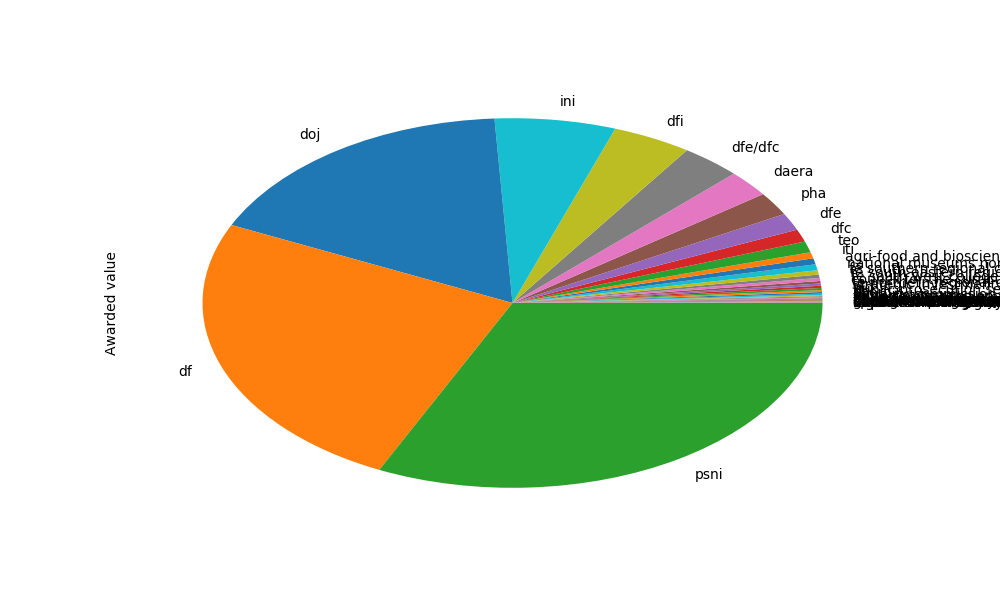

In [35]:
f,ax = plt.subplots(figsize = graph_figsize)
services_df.groupby('Contract awarded by')['Awarded value'].sum().sort_values().plot.pie(ax=ax)

In [36]:
def make_autopct(total):
    def my_autopct(pct):
        val = int(round(pct*total/100.0))
        return '{p:.1f}%  (£{v:,.1f}m)'.format(p=pct,v=val/1000000)
    return my_autopct

<IPython.core.display.Javascript object>


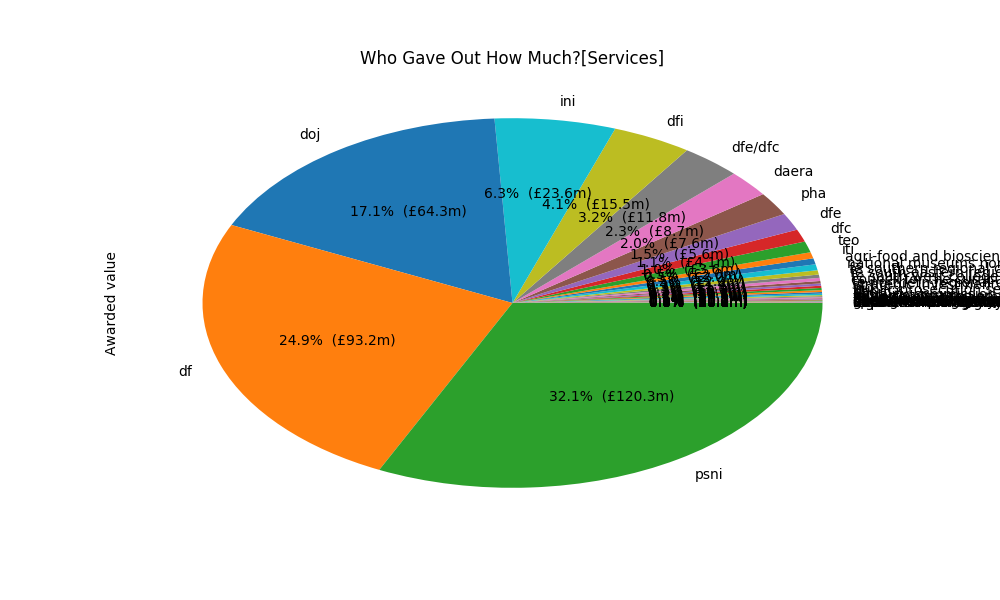

In [37]:
f,ax = plt.subplots(figsize = graph_figsize)
services_df.groupby('Contract awarded by')['Awarded value'].sum().sort_values().plot.pie(
    ax=ax, 
    autopct=make_autopct(services_df['Awarded value'].sum()),
    title='Who Gave Out How Much?[Services]'
)

<IPython.core.display.Javascript object>


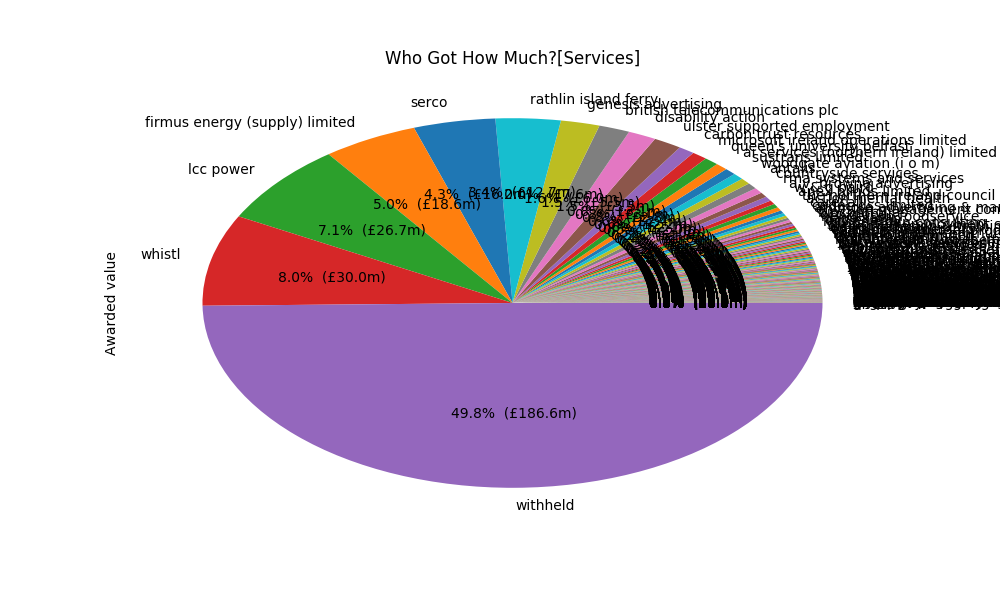

In [38]:
f,ax = plt.subplots(figsize = graph_figsize)
services_df.groupby('Company name')['Awarded value'].sum().sort_values().plot.pie(
    ax=ax,
    autopct=make_autopct(services_df['Awarded value'].sum()),
    title='Who Got How Much?[Services]'
)

## Graphing: Construction
Same as before but on the Construction Dataset

<IPython.core.display.Javascript object>


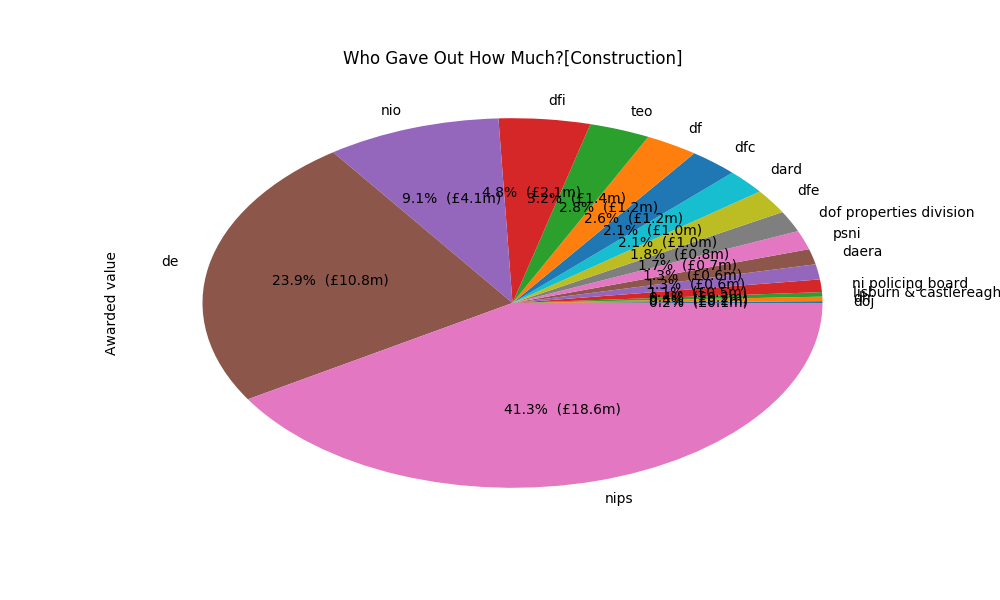

In [39]:
f,ax = plt.subplots(figsize = graph_figsize)
construction_df.groupby('Contract awarded by')['Awarded value'].sum().sort_values().plot.pie(
    ax=ax, autopct=make_autopct(construction_df['Awarded value'].sum()),
    title='Who Gave Out How Much?[Construction]'
)

<IPython.core.display.Javascript object>


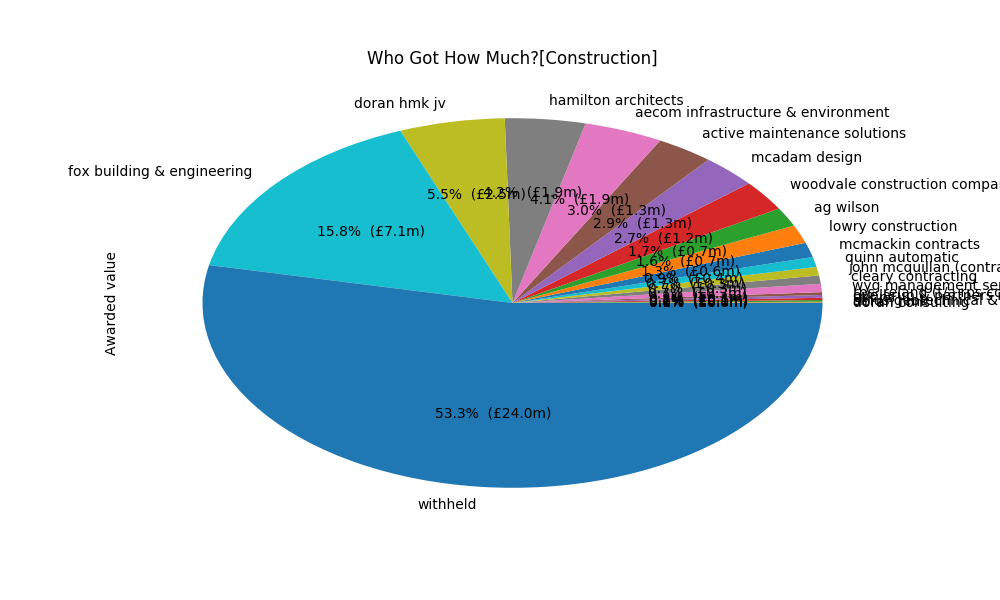

In [40]:
f,ax = plt.subplots(figsize = graph_figsize)
construction_df.groupby('Company name')['Awarded value'].sum().sort_values().plot.pie(
    ax=ax,autopct=make_autopct(construction_df['Awarded value'].sum()),
    title='Who Got How Much?[Construction]'
)

# Combining Datasets for 50% profit
There are always risks in combining datasets
* Inner/Outer joining
* Column mismatches
* Duplicate Values

Since we've already walked through each dataset so it *should* make sense and be common across, we can concatenate the datasets together

_Need to be careful that we end up with the same number of records in total_

In [41]:
[s[0] for s in [services_df.shape, 
                construction_df.shape, 
                pd.concat([services_df,construction_df]).shape]
]

[532, 71, 603]

In [42]:
df = pd.concat([services_df,construction_df])
df.head()

,Awarded value,Basis for DAC Award,City,Company name,Contract Number,Contract awarded by,Contract end date,Date of Award,Division,Latitude,Longitude,Postal code,Street,Title,_id
0,77000.0,,london,wilmington publishing &amp; information,NaN,daera,2021-03-04T00:00:00,2016-04-04T00:00:00,services,51.5299906,-0.0911146,N1 7JQ,6-14 underwood street,cft223170 - doe – access to pension scheme leg...,1
1,35400.0,,belfast,perceptive insight market research,NaN,dfc,2016-04-08T00:00:00,2016-04-04T00:00:00,services,54.5942121,-5.8886505,BT5 5AB,109 bloomfield avenue,[275750- sc1] - dsd – consultancy to carry out...,2
2,430700.0,,"ballyvourney industrial estate, co. cork",dgp intelsius,NaN,daera,2020-04-04T00:00:00,2016-05-04T00:00:00,services,51.944811,-9.161592,P12 A527,unit 8,[123894- sc1] - dard - supply and delivery of ...,3
3,430700.0,,belfast,premier scientific,NaN,daera,2020-04-04T00:00:00,2016-05-04T00:00:00,services,54.6392358,-5.9014562,BT3 9LA,unit 3 scientific,[123894- sc2] - dard - supply and delivery of ...,4
4,NaN,,coalville,antalis,NaN,df,2016-12-31T00:00:00,2016-06-04T00:00:00,services,52.6972651,-1.3422078,LE67 1LE,gateway house,[272312- sc1] - pan goverment collaborative ar...,5


## Once more with feeling
Plotting everything together

<IPython.core.display.Javascript object>


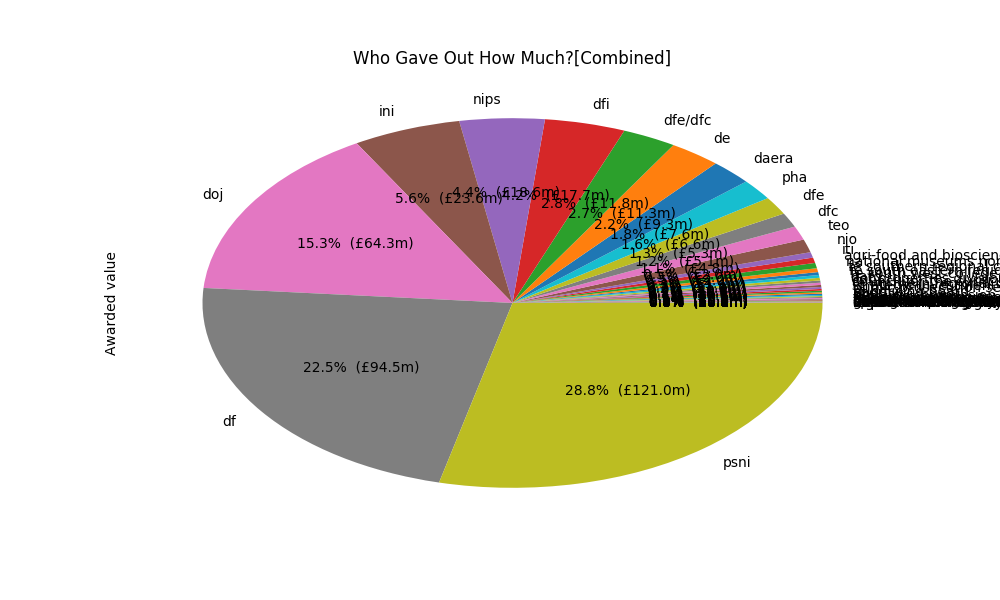

In [43]:
f,ax = plt.subplots(figsize = graph_figsize)
df.groupby('Contract awarded by')['Awarded value'].sum().sort_values().plot.pie(
    ax=ax, 
    autopct=make_autopct(df['Awarded value'].sum()),
    title='Who Gave Out How Much?[Combined]'
)
#Note NIPS was the biggest Construction buyer 

<IPython.core.display.Javascript object>


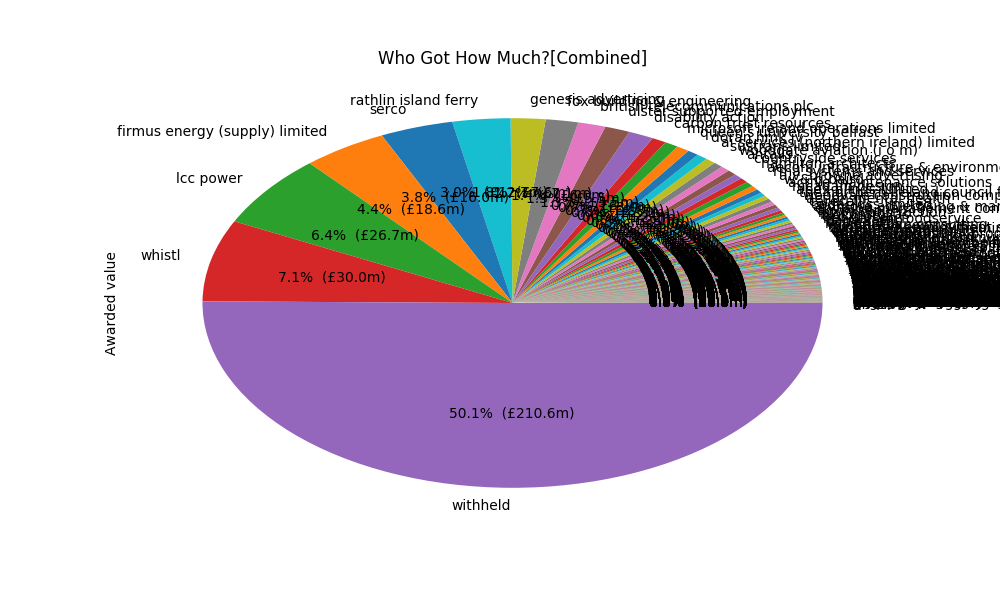

In [44]:
f,ax = plt.subplots(figsize = graph_figsize)
df.groupby('Company name')['Awarded value'].sum().sort_values().plot.pie(
    ax=ax,
    autopct=make_autopct(df['Awarded value'].sum()),
    title='Who Got How Much?[Combined]'
)

<IPython.core.display.Javascript object>


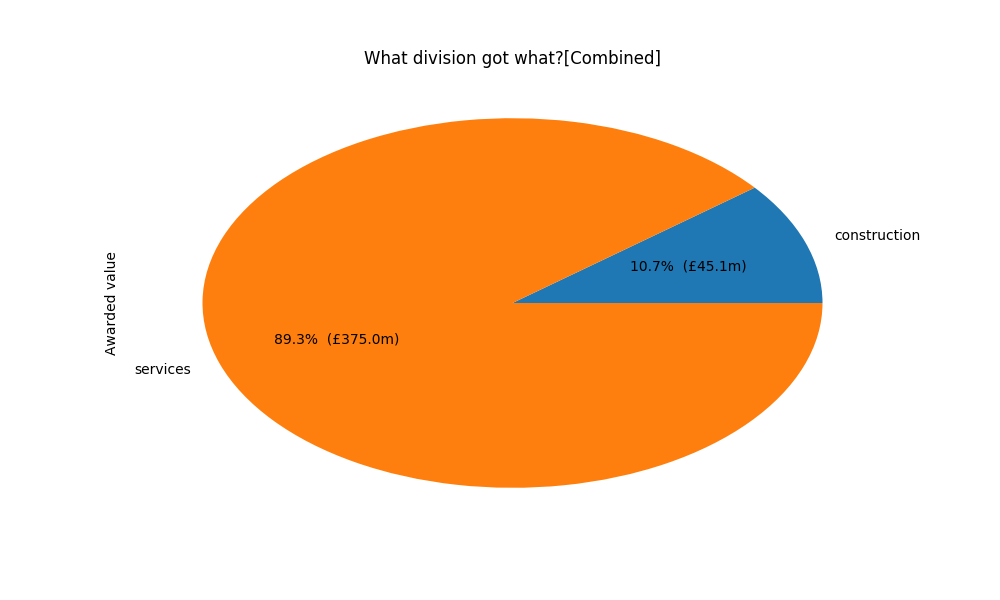

In [45]:
f,ax = plt.subplots(figsize = graph_figsize)
df.groupby('Division')['Awarded value'].sum().sort_values().plot.pie(
    ax=ax,
    autopct=make_autopct(df['Awarded value'].sum()),
    title='What division got what?[Combined]'
)

# Timeseries for fun and transparancy
AKA `pandas` is magic

In [46]:
df.dtypes

Awarded value          float64
Basis for DAC Award     object
City                    object
Company name            object
Contract Number         object
Contract awarded by     object
Contract end date       object
Date of Award           object
Division                object
Latitude                object
Longitude               object
Postal code             object
Street                  object
Title                   object
_id                      int64
dtype: object

In [47]:
for c in ['Date of Award','Contract end date']:
    df[c]=pd.to_datetime(df[c])

<IPython.core.display.Javascript object>


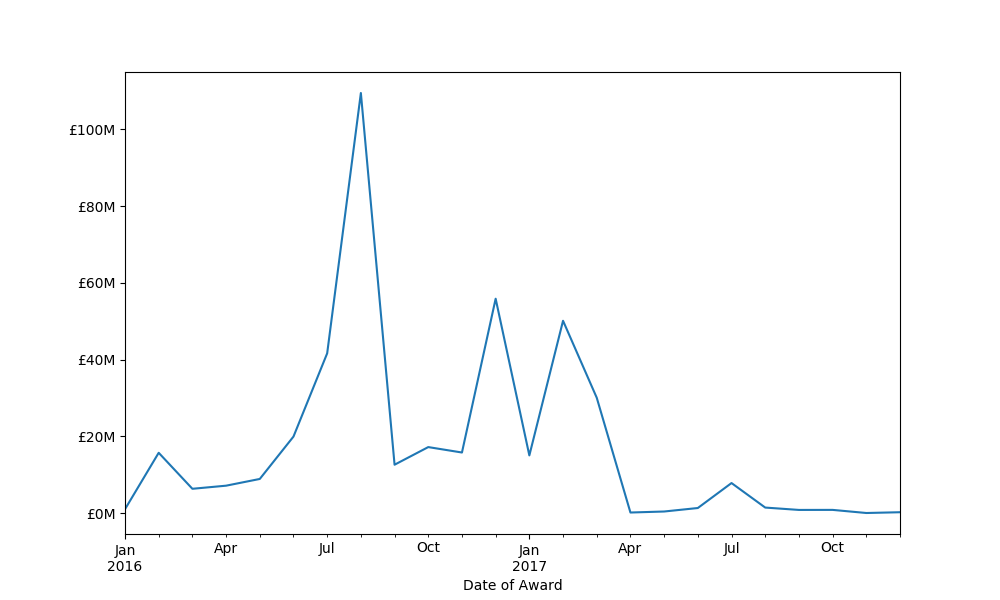

In [48]:
f,ax = plt.subplots(figsize=graph_figsize)
ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x,y: '£{:,d}M'.format(int(x/10**6))))
df.groupby(pd.TimeGrouper(key='Date of Award',freq='M'))['Awarded value'].sum().plot(ax=ax)

In [49]:

def _x_month_formatter(x,y):
    return '{year}-{month}'.format(year=x.year, month=x.month)

_df_month=df.groupby([pd.TimeGrouper(key='Date of Award',freq='M'),'Division'])['Awarded value'].sum().unstack()
_df_month

Division,construction,services
Date of Award,,
2016-01-31,150762.48,8.630701e+05
2016-02-29,498616.99,1.522289e+07
2016-03-31,302605.77,6.034000e+06
2016-04-30,570716.00,6.575130e+06
2016-05-31,762860.00,8.137090e+06
2016-06-30,331637.60,1.961610e+07
2016-07-31,1419926.00,4.022911e+07
2016-08-31,749781.00,1.087615e+08
2016-09-30,4289699.56,8.321629e+06


<IPython.core.display.Javascript object>


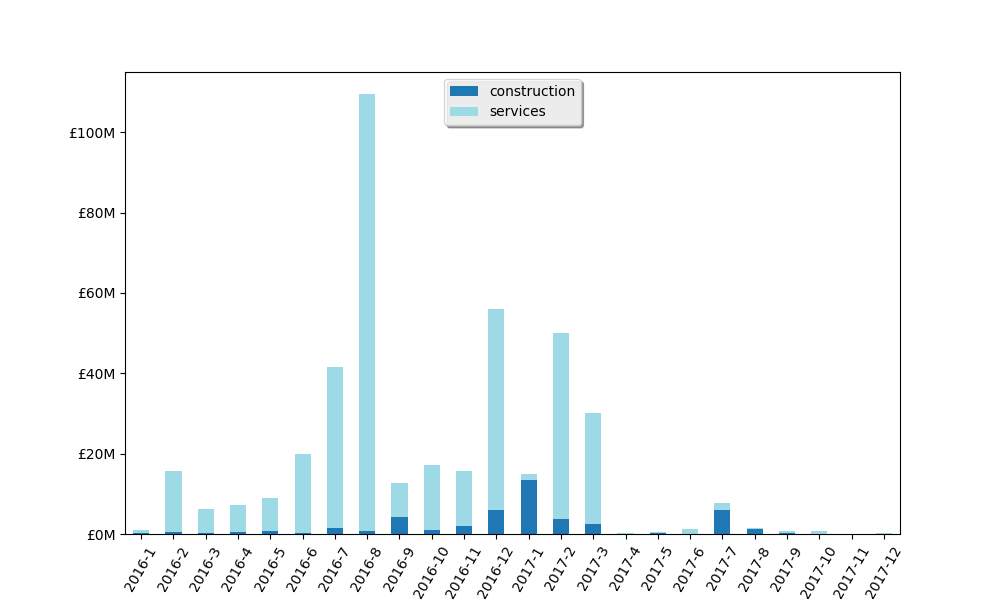

In [50]:
f,ax = plt.subplots(figsize=graph_figsize)
_df_month.plot.bar(ax=ax, stacked=True, cmap=plt.get_cmap('tab20'))
ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x,y: '£{:,d}M'.format(int(x/10**6))))
ax.xaxis.set_major_formatter(tick.FixedFormatter(_df_month.index.map(lambda d: '{}-{}'.format(d.year,d.month))))
_=plt.setp( ax.xaxis.get_majorticklabels(), rotation=60 )
ax.legend(loc='upper center',ncol=1, fancybox=True, shadow=True)

<IPython.core.display.Javascript object>


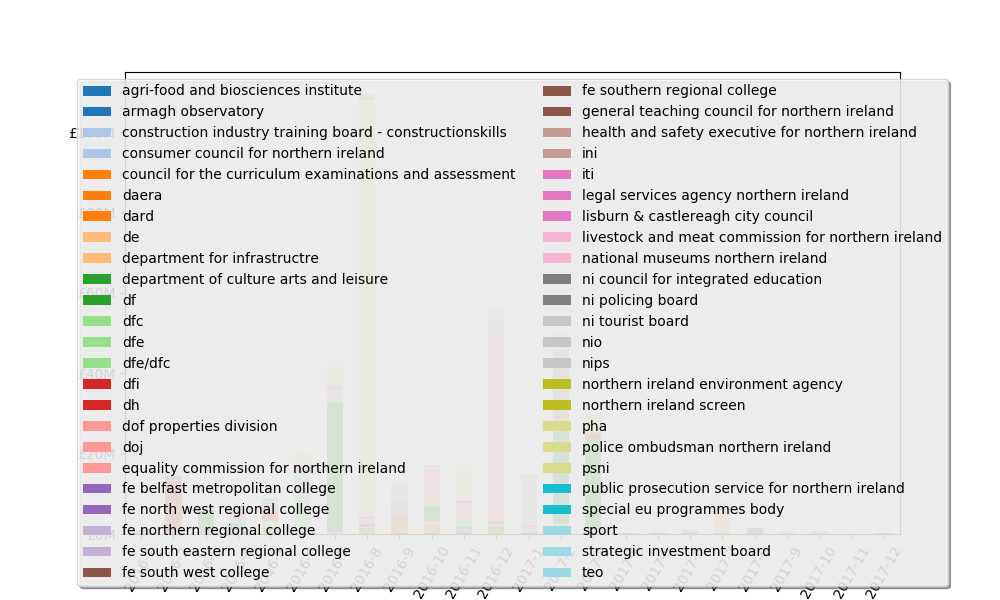

In [51]:
_df_month=df.groupby([pd.TimeGrouper(key='Date of Award',freq='M'),'Contract awarded by'])['Awarded value'].sum().unstack()
f,ax = plt.subplots(figsize=graph_figsize)
_df_month.plot.bar(ax=ax, stacked=True, cmap=plt.get_cmap('tab20'))
ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x,y: '£{:,d}M'.format(int(x/10**6))))
ax.xaxis.set_major_formatter(tick.FixedFormatter(_df_month.index.map(lambda d: '{}-{}'.format(d.year,d.month))))
_=plt.setp( ax.xaxis.get_majorticklabels(), rotation=60 )
ax.legend(loc='upper center',ncol=2, fancybox=True, shadow=True)

## What a total mess!

Too many varying tiny department names make graphs ugly as hell

Create temporary mapping for bottom 30%ile

In [52]:
_contract_sums = df.groupby('Contract awarded by')['Awarded value'].sum().sort_values(ascending=False)
_contract_sums.head()

Contract awarded by
psni    1.210008e+08
df      9.447637e+07
doj     6.433484e+07
ini     2.364597e+07
nips    1.860020e+07
Name: Awarded value, dtype: float64

In [53]:
_contract_sums.cumsum().head()

Contract awarded by
psni    1.210008e+08
df      2.154771e+08
doj     2.798120e+08
ini     3.034579e+08
nips    3.220581e+08
Name: Awarded value, dtype: float64

In [54]:
in_bottom_tertile=_contract_sums.cumsum()>_contract_sums.cumsum().quantile(0.3)
in_bottom_tertile

Contract awarded by
psni                                                         False
df                                                           False
doj                                                          False
ini                                                          False
nips                                                         False
dfi                                                          False
dfe/dfc                                                      False
de                                                           False
daera                                                        False
pha                                                          False
dfe                                                          False
dfc                                                          False
teo                                                          False
nio                                                          False
iti                                       

In [55]:
df_tertile = df.copy()
df_tertile['Contract awarded by'] = df_tertile['Contract awarded by'].apply(
    lambda x: "other" 
        if in_bottom_tertile.loc[x] 
        else x
)

<IPython.core.display.Javascript object>


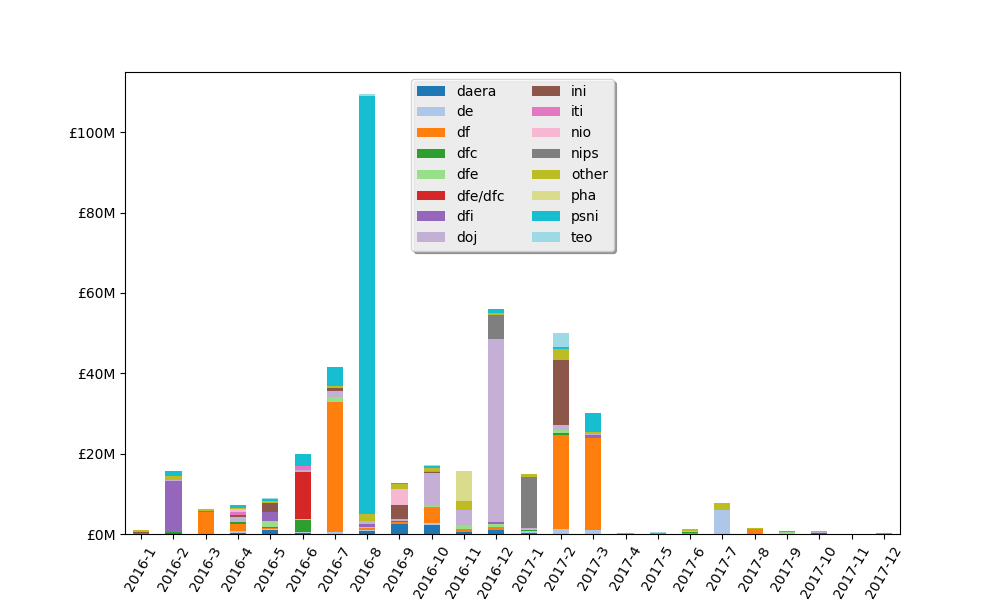

In [56]:
_df_month=df_tertile.groupby([pd.TimeGrouper(key='Date of Award',freq='M'),'Contract awarded by'])['Awarded value'].sum().unstack()
f,ax = plt.subplots(figsize=graph_figsize)
_df_month.plot.bar(ax=ax, stacked=True, cmap=plt.get_cmap('tab20'))
ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x,y: '£{:,d}M'.format(int(x/10**6))))
ax.xaxis.set_major_formatter(tick.FixedFormatter(_df_month.index.map(lambda d: '{}-{}'.format(d.year,d.month))))
_=plt.setp( ax.xaxis.get_majorticklabels(), rotation=60 )
ax.legend(loc='upper center',ncol=2, fancybox=True, shadow=True)

## BONUS ROUND: `cufflinks`
Basically Magic that binds a new `iplot` method to `pandas` objects to call the [plot.ly](https://plot.ly) interface.

In [57]:
df_tertile.groupby([pd.TimeGrouper(key='Date of Award',freq='M'),'Contract awarded by'])['Awarded value']\
    .sum().unstack().iplot(
        kind='bar', barmode='stack', filename='blug-stackedbar-aug-17',world_readable=True
    )

/home/bolster/anaconda3/lib/python3.6/site-packages/cufflinks/plotlytools.py:156: FutureWarning:

pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp



In [58]:
df_tertile.groupby([pd.TimeGrouper(key='Date of Award',freq='M'),'Contract awarded by'])['Awarded value']\
    .sum().unstack().iplot(
        kind='heatmap',colorscale='spectral', filename='blug-heatmap-aug-17',world_readable=True
    )

# `seaborn`
> Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.
And it has far more power than I would ever have time to explore

<IPython.core.display.Javascript object>


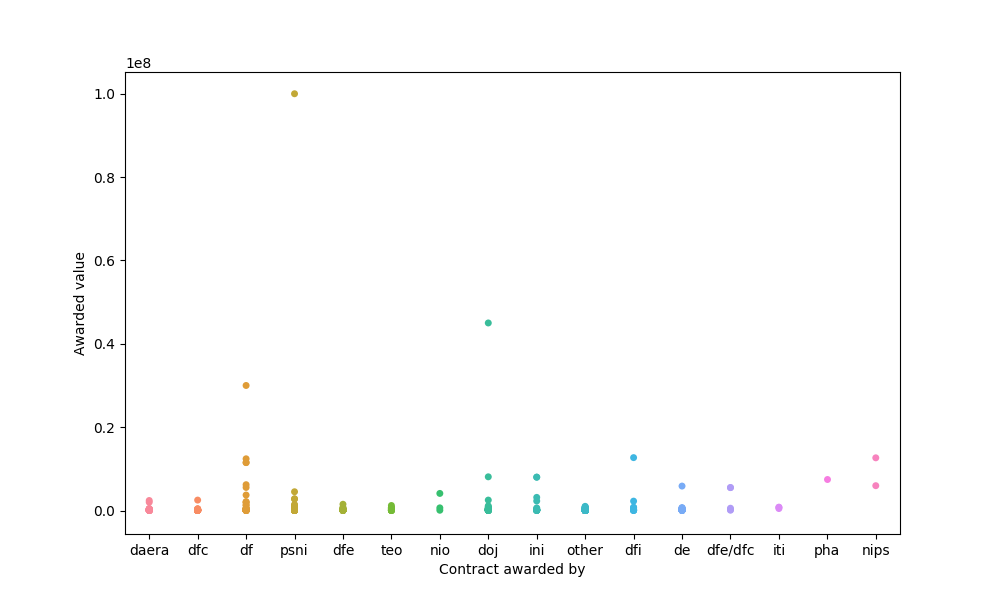

In [59]:
f,ax = plt.subplots(figsize=graph_figsize)
seaborn.stripplot(
    data=df_tertile, ax=ax,
    x="Contract awarded by", y="Awarded value"
)

<IPython.core.display.Javascript object>


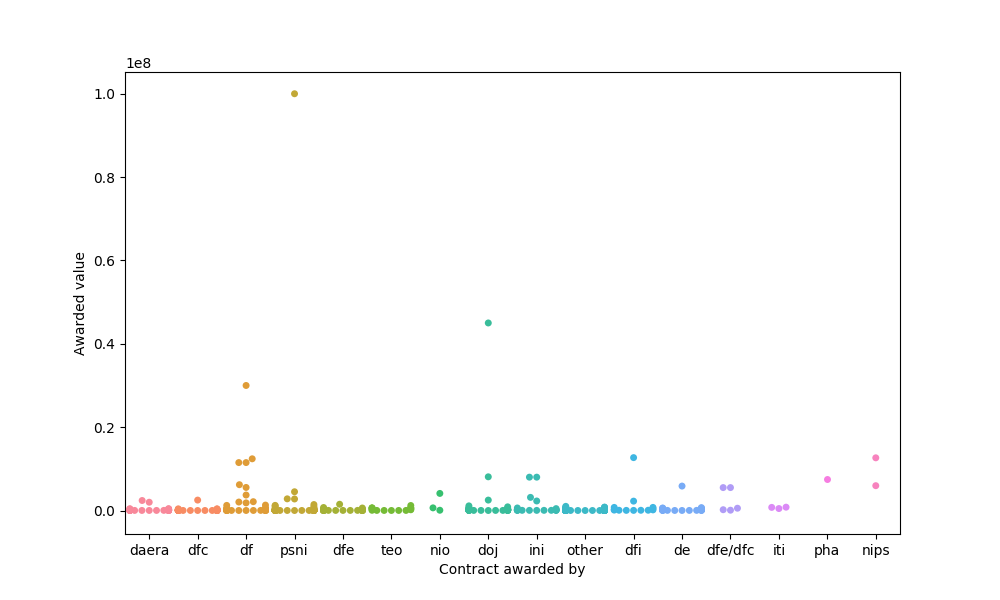

In [60]:
f,ax = plt.subplots(figsize=graph_figsize)
seaborn.swarmplot(
    data=df_tertile, ax=ax,
    x="Contract awarded by", y="Awarded value"
)

<IPython.core.display.Javascript object>


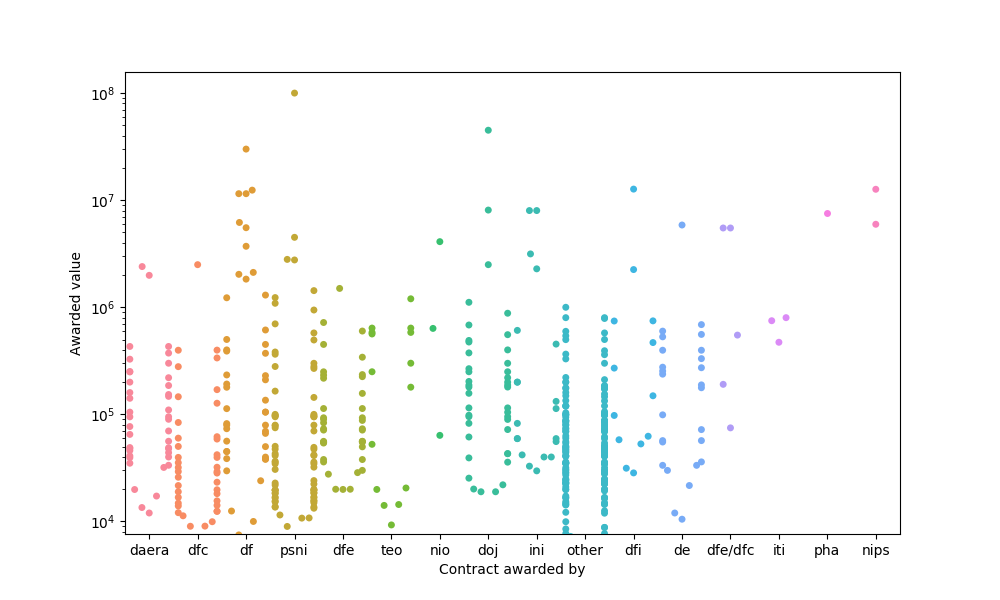

In [61]:
f,ax = plt.subplots(figsize=graph_figsize)
seaborn.swarmplot(
    data=df_tertile, ax=ax,
    x="Contract awarded by", y="Awarded value"
)
ax.set_yscale('log')


<IPython.core.display.Javascript object>


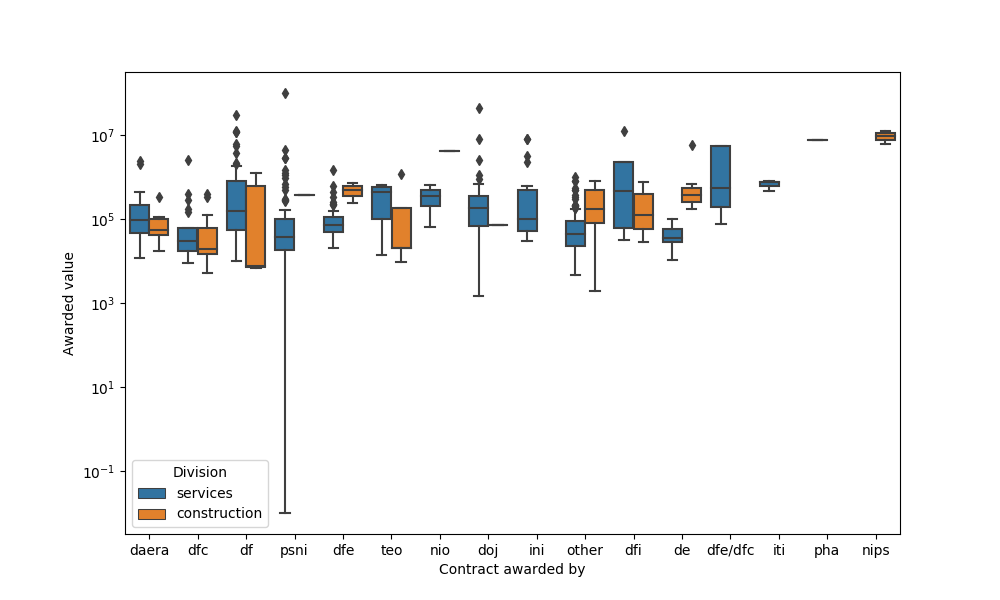

In [62]:
f,ax = plt.subplots(figsize=graph_figsize)
seaborn.boxplot(
    data=df_tertile, ax=ax,
    x="Contract awarded by", y="Awarded value",
    hue="Division"
)
ax.set_yscale('log')

<IPython.core.display.Javascript object>


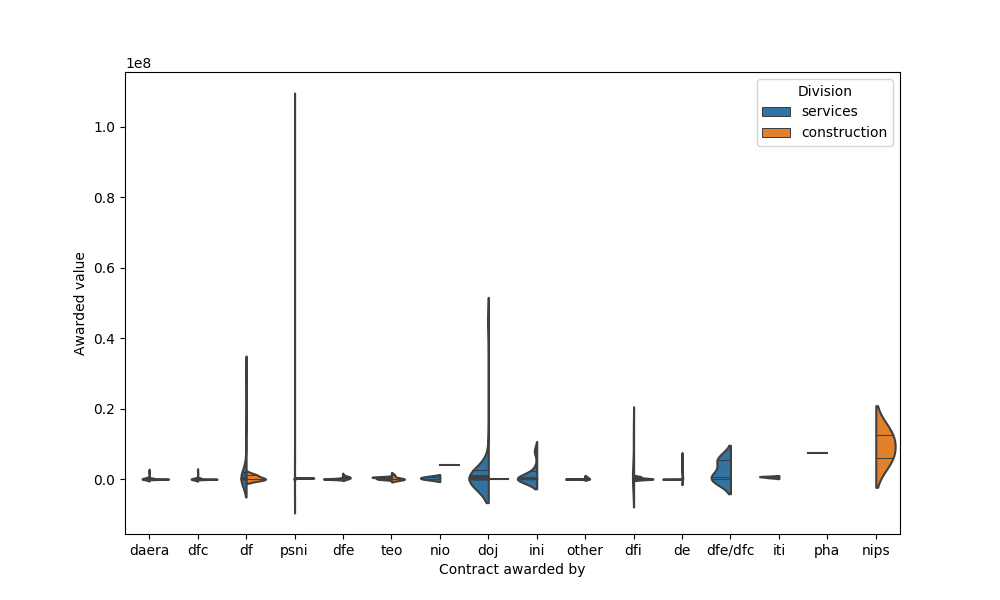

In [63]:
f,ax = plt.subplots(figsize=graph_figsize)
seaborn.violinplot(
    data=df_tertile, ax=ax,
    x="Contract awarded by", y="Awarded value",
    hue="Division", split=True, inner="stick"
)

In [64]:
df_tertile['Month of Award'] = df_tertile['Date of Award'].dt.month

<IPython.core.display.Javascript object>


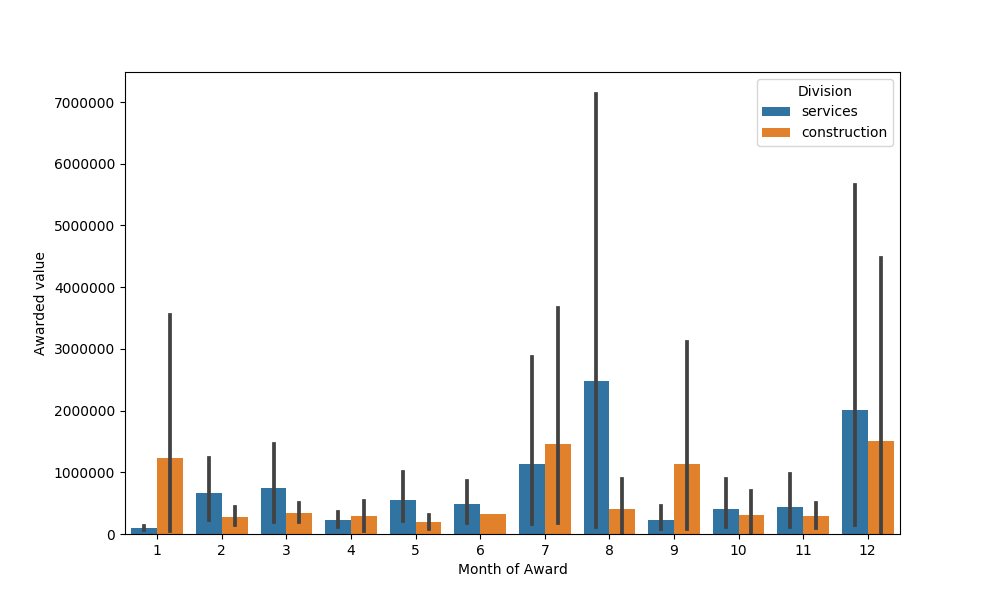

In [65]:
f,ax = plt.subplots(figsize=graph_figsize)
seaborn.barplot(data=df_tertile, ax=ax,
    y="Awarded value",
    x="Month of Award",
    hue="Division",
)

<IPython.core.display.Javascript object>


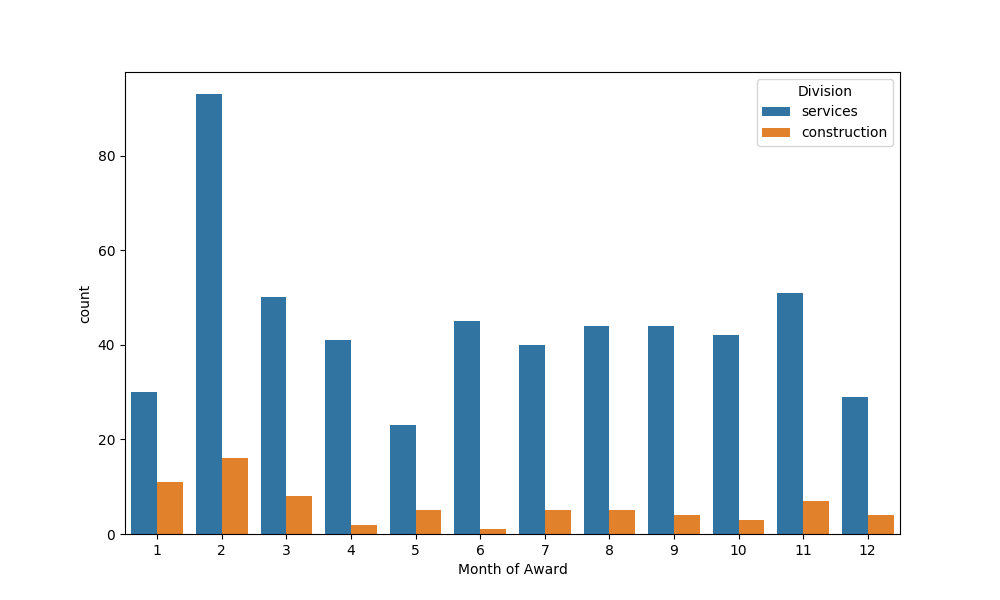

In [66]:
f,ax = plt.subplots(figsize=graph_figsize)
seaborn.countplot(data=df_tertile, ax=ax,
    x="Month of Award",
    hue="Division",
)

<IPython.core.display.Javascript object>


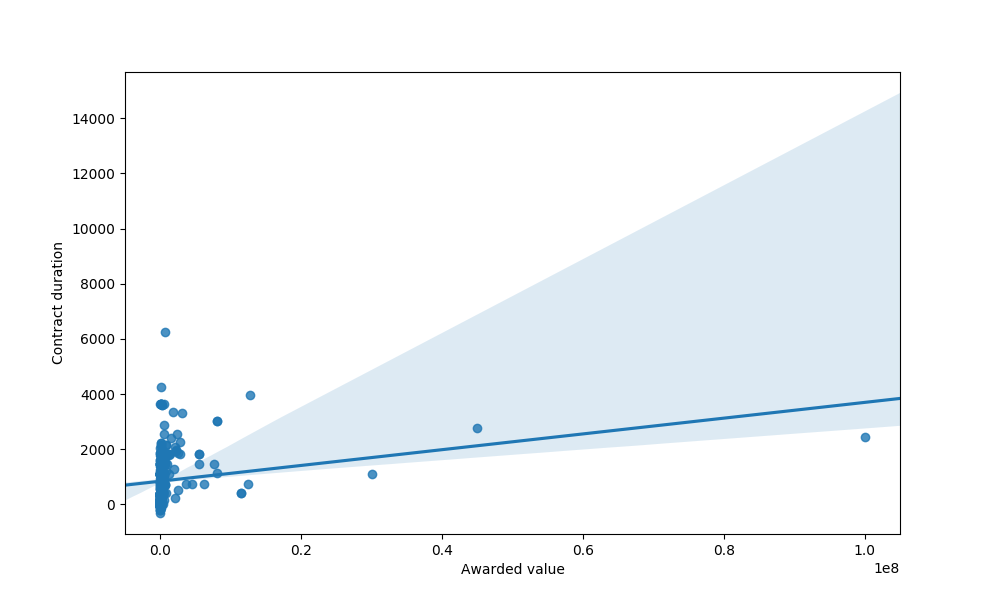

In [67]:
f,ax = plt.subplots(figsize=graph_figsize)
df_tertile['Contract duration'] = (df_tertile['Contract end date'] - df_tertile['Date of Award']).dt.days
seaborn.regplot(data=df_tertile, x='Awarded value', y='Contract duration', ax=ax)

<IPython.core.display.Javascript object>


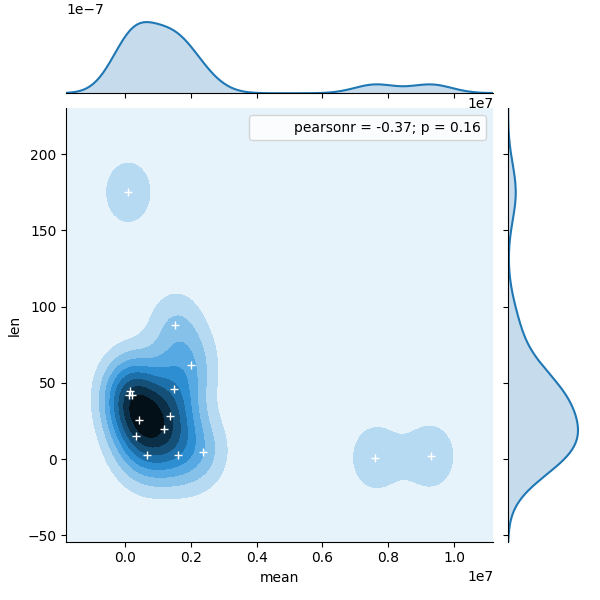

In [68]:
g=seaborn.jointplot(data = df_tertile.groupby('Contract awarded by')['Awarded value'].agg([np.mean,np.sum,len]).reset_index(),
            x='mean', y='len', kind='kde')
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")


In [69]:
for c in ['Latitude','Longitude']:
    df[c]=df[c].astype(float)
df_with_geo=df[df[['Latitude','Longitude']].abs().sum(axis=1)>0]
centre = df_with_geo[['Latitude','Longitude']].mean()
mins = df_with_geo[['Latitude','Longitude']].min()
maxs = df_with_geo[['Latitude','Longitude']].max()


def get_marker_colour(logmon):
    if logmon < 5.0:
        return ('go')
    elif logmon < 6.0:
        return ('yo')
    else:
        return ('ro')
    
def _plot(r):
    x,y = m(r['Longitude'],r['Latitude'])
    if r['Awarded value'] is None:
        m_size=1
    else:
        m_size = np.log10(r['Awarded value'])
    m.plot(x,y,get_marker_colour(m_size), markersize=m_size)

<IPython.core.display.Javascript object>


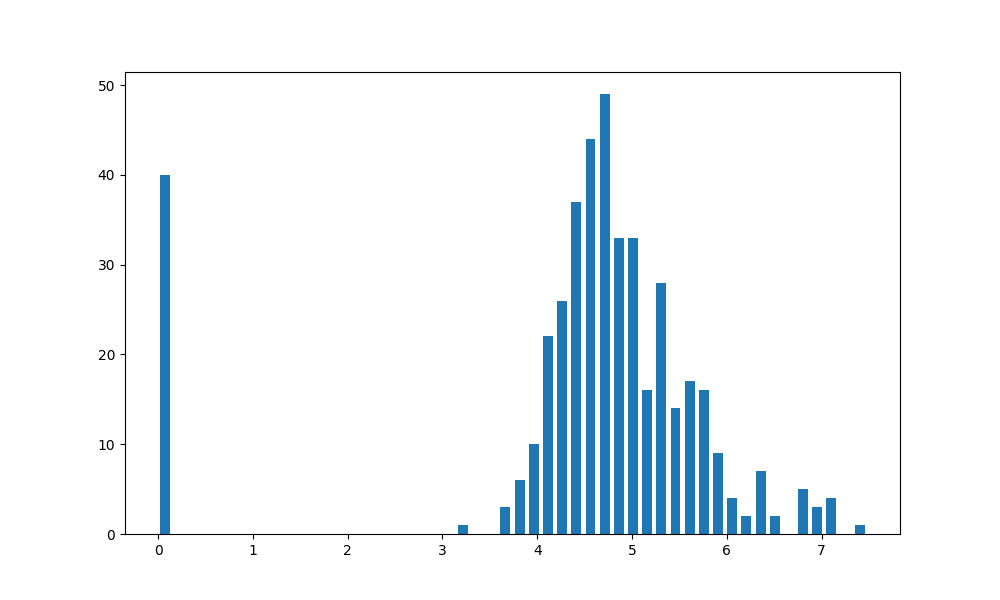

<Container object of 50 artists>

In [70]:
f,ax = plt.subplots(figsize=graph_figsize)
x=np.log10(df_with_geo['Awarded value'].fillna(1).values)
hist, bins = np.histogram(x, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
ax.bar(center, hist, align='center', width=width)


<IPython.core.display.Javascript object>


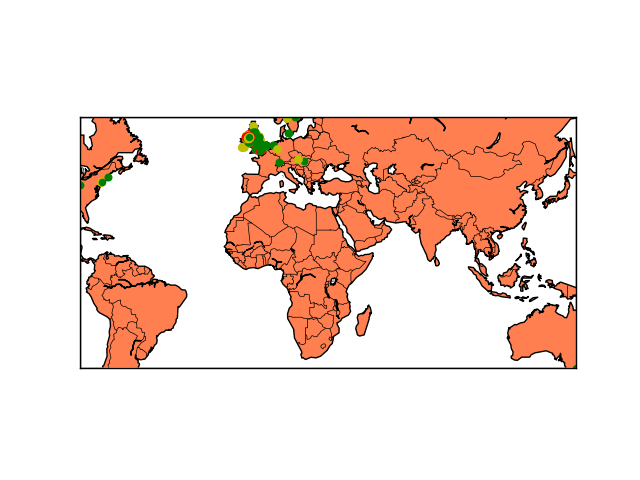

In [71]:
f,ax = plt.subplots()
m = Basemap(projection='merc', lon_0=centre['Longitude'], lat_0=centre['Latitude'],
            llcrnrlon=mins['Longitude'], llcrnrlat=mins['Latitude'],
            urcrnrlon=maxs['Longitude'], urcrnrlat=maxs['Latitude'])
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color = 'coral')
m.drawmapboundary()

_=df_with_geo.apply(_plot, axis=1)

In [72]:
mins = df_with_geo[['Latitude','Longitude']].quantile(0.009)
maxs = df_with_geo[['Latitude','Longitude']].quantile(0.991)

<IPython.core.display.Javascript object>


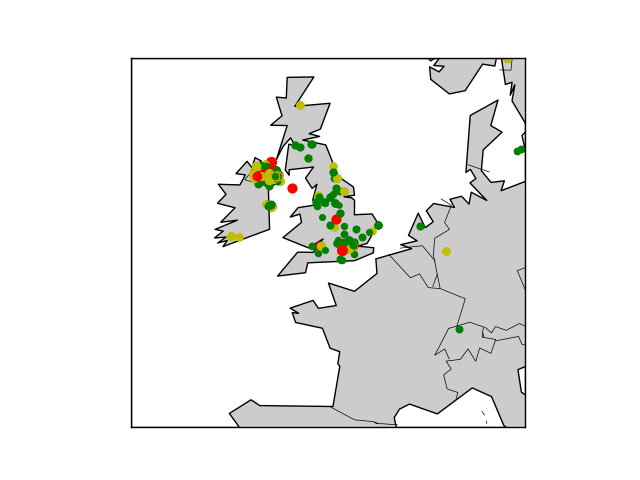

In [73]:
f,ax = plt.subplots()
m = Basemap(projection='merc', lon_0=centre['Longitude'], lat_0=centre['Latitude'],
            llcrnrlon=mins['Longitude'], llcrnrlat=mins['Latitude'],
            urcrnrlon=maxs['Longitude'], urcrnrlat=maxs['Latitude'])
m.drawcoastlines()
m.drawcountries()
m.fillcontinents()
m.drawmapboundary()

_=df_with_geo.apply(_plot, axis=1)

<IPython.core.display.Javascript object>


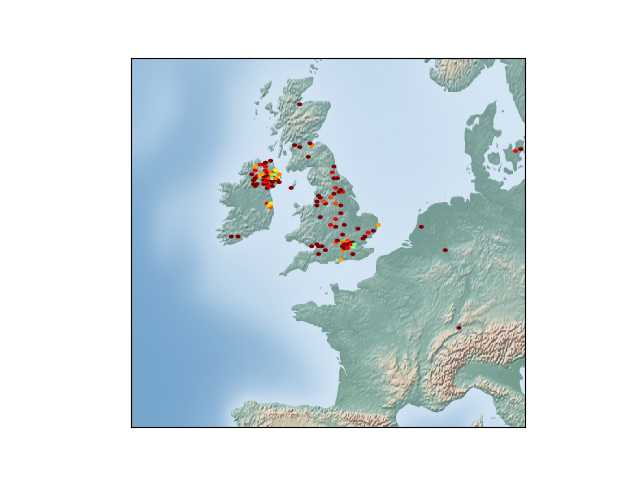

In [91]:
f,ax = plt.subplots()
m = Basemap(projection='merc', lon_0=centre['Longitude'], lat_0=centre['Latitude'],
            llcrnrlon=mins['Longitude'], llcrnrlat=mins['Latitude'],
            urcrnrlon=maxs['Longitude'], urcrnrlat=maxs['Latitude'])
m.shadedrelief()

x,y = m(df_with_geo['Longitude'].values, df_with_geo['Latitude'].values)
m.hexbin(x,y,gridsize=[900,400],bins='log', mincnt=1, cmap='jet_r')

There's so much more in `seaborn` but really not enough time to show, so hopefully this was an interesting start